In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.input_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))
display(HTML("<style>.output_area pre {font-family: Consolas; font-size: 12pt; line-height: 140%;}</style>"))

In [2]:
import pandas as pd

In [3]:
file_path = '../data/chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [6]:
print(chipo.shape)
print(chipo.info())

(4622, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB
None


In [7]:
chipo.head()

order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98

In [11]:
print(chipo.columns)
print('-------------------------------------------')
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
-------------------------------------------
RangeIndex(start=0, stop=4622, step=1)


In [16]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
print(chipo.describe()) # chipo dataframe에서 수치형 피처들의 요약 통계량을 확인

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [34]:
#order_id와 item_name은 범주형 피처이기 때문에 unique사용
# order_id의 개수
print(len(chipo['order_id'].unique()))
# item_name의 개수
print(len(chipo['item_name'].unique()))

1834
50


In [32]:
item_count = chipo['item_name'].value_counts()[:10]
print(item_count)
chipo['item_name'].value_counts()

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Steak Bowl                      211
Chips                           211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64


Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [22]:
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [24]:
#아이템별 주문 개수
order_count = chipo.groupby('item_name')['order_id'].count()
order_count

item_name
6 Pack Soft Drink                         54
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     11
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            162
Bowl                                       2
Burrito                                    6
Canned Soda                              104
Canned Soft Drink                        301
Carnitas Bowl                             68
Carnitas Burrito                          59
Carnitas Crispy Tacos                      7
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             726
Chicken Burrito                          553
Chicken Crispy Tacos                      47
Chicken Salad                              9
Chicken Salad Bowl                       110


In [26]:
#아이템별 주문 총량
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity

item_name
6 Pack Soft Drink                         55
Barbacoa Bowl                             66
Barbacoa Burrito                          91
Barbacoa Crispy Tacos                     12
Barbacoa Salad Bowl                       10
Barbacoa Soft Tacos                       25
Bottled Water                            211
Bowl                                       4
Burrito                                    6
Canned Soda                              126
Canned Soft Drink                        351
Carnitas Bowl                             71
Carnitas Burrito                          60
Carnitas Crispy Tacos                      8
Carnitas Salad                             1
Carnitas Salad Bowl                        6
Carnitas Soft Tacos                       40
Chicken Bowl                             761
Chicken Burrito                          591
Chicken Crispy Tacos                      50
Chicken Salad                              9
Chicken Salad Bowl                       123


# 시각화 하기

In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Distribution of all ordered item')

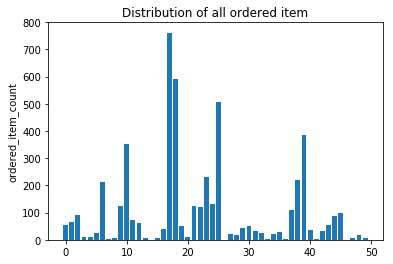

In [31]:
#tolist = 배열을 list형태로 바꿔줌
item_name_list = item_quantity.index.tolist()
# print(item_name_list)
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos, order_cnt, align = 'center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all ordered item')

In [35]:
#미니퀴즈
#value_counts()는 Series 객체에만 적용 / 피처 내에 몇 개의 값이 있는지 확인 / 각 피처에 대한 개수 출력
#unique()는 범주형 피처에 적용 / 피처 내에 몇 개의 범주가 있는지를 확인 / 각 피처 이름을 출력

In [36]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [46]:
chipo['item_price'].head()

0     2.39
1     3.39
2     3.39
3     2.39
4    16.98
Name: item_price, dtype: float64

In [ ]:
#$ 기호를 제거해주는 전처리 작업
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:])) #첫 단어를 제외한 나머지 문자열을 수치형으로 바꿔줌
chipo.describe()
#apply()함수는 시리즈 단위의 연산을 처리하는 기능을 수행하며, sum이나 mean과 같이 연산이 정의된 함수를 파라미터로 받는다.

In [47]:
chipo.describe()

quantity   item_price
count  4622.000000  4622.000000
mean      1.075725     7.464336
std       0.410186     4.245557
min       1.000000     1.090000
25%       1.000000     3.390000
50%       1.000000     8.750000
75%       1.000000     9.250000
max      15.000000    44.250000

In [48]:
# 주문당 평균 계산 금액 출력하기
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428717

In [53]:
#한 주문에 10달러 이상 지불한 주문번호 id 출력하기
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]
print(results[:10])
print(results.index.values)

          quantity  item_price
order_id                      
1                4       11.56
10               2       13.20
100              2       10.08
1000             2       20.50
1001             2       10.08
1002             2       10.68
1003             2       13.00
1004             2       21.96
1005             3       12.15
1006             8       71.40
['1' '10' '100' ... '997' '998' '999']


In [57]:
#각 아이템의 가격 구하기
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
# price_per_item
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

order_id  quantity  \
item_name                                  
Steak Salad Bowl          1032         1   
Barbacoa Salad Bowl       1283         1   
Carnitas Salad Bowl       1035         1   
Carnitas Soft Tacos       1011         1   
Carnitas Crispy Tacos     1774         1   
Steak Soft Tacos          1054         1   
Carnitas Salad            1500         1   
Carnitas Bowl             1007         1   
Barbacoa Soft Tacos       1103         1   
Barbacoa Crispy Tacos      110         1   

                                                      choice_description  \
item_name                                                                  
Steak Salad Bowl                           [Fresh Tomato Salsa, Lettuce]   
Barbacoa Salad Bowl                      [Fresh Tomato Salsa, Guacamole]   
Carnitas Salad Bowl    [Fresh Tomato Salsa, [Rice, Black Beans, Chees...   
Carnitas Soft Tacos    [Fresh Tomato Salsa (Mild), [Black Beans, Rice...   
Carnitas Crispy Tacos  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...   
Steak Soft Tacos       [Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]   
Carnitas Salad         [[Fresh Tomato Salsa (Mild), Roasted Chili Cor...   
Carnitas Bowl          [Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...   
Barbacoa Soft Tacos    [Fresh Tomato Salsa, [Black Beans, Cheese, Let...   
Barbacoa Crispy Tacos                    [Fresh Tomato Salsa, Guacamole]   

                       item_price  
item_name                          
Steak Salad Bowl             9.39  
Barbacoa Salad Bowl          9.39  
Carnitas Salad Bowl          9.39  
Carnitas Soft Tacos          8.99  
Carnitas Crispy Tacos        8.99  
Steak Soft Tacos             8.99  
Carnitas Salad               8.99  
Carnitas Bowl                8.99  
Barbacoa Soft Tacos          8.99  
Barbacoa Crispy Tacos        8.99

#시각화

Text(0.5, 1.0, 'Distribution of item price')

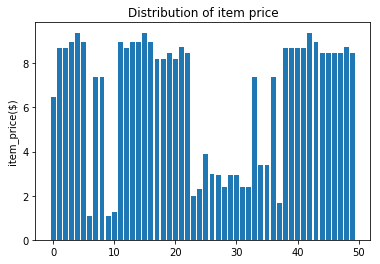

In [60]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos, item_price, align ='center')
plt.ylabel('item_price($)')
plt.title('Distribution of item price')

Text(0.5, 1.0, 'Histogram of item price')

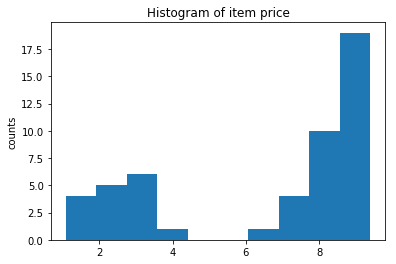

In [61]:
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

In [62]:
#가장 비싼 주문에서 아이템이 총 몇 개 팔렸는지 구하기
chipo.groupby('order_id').sum().sort_values(by='item_price', ascending=False)[:5]

quantity  item_price
order_id                      
926             23      205.25
1443            35      160.74
1483            14      139.00
691             11      118.25
1786            20      114.30

In [70]:
#Veggie Salad Bowl이 몇 번 주문되었는지 구하기
chipo_salad = chipo[chipo['item_name'] == "Veggie Salad Bowl"]
chipo_salad = chipo_salad.drop_duplicates(['item_name', 'order_id']) #중복 제거

print(len(chipo_salad))
chipo_salad.head()

18


order_id  quantity          item_name  \
186       83         1  Veggie Salad Bowl   
295      128         1  Veggie Salad Bowl   
455      195         1  Veggie Salad Bowl   
496      207         1  Veggie Salad Bowl   
960      394         1  Veggie Salad Bowl   

                                    choice_description  item_price  
186  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
295  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...       11.25  
455  [Fresh Tomato Salsa, [Fajita Vegetables, Rice,...       11.25  
496  [Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...       11.25  
960  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...        8.75

In [69]:
#Chicken Bowl을 2개 이상 주문한 주문 횟수 구하기
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]
print(len(chipo_chicken_result))
chipo_chicken_result.head()

114


order_id
1004    2
1023    2
1072    2
1078    2
1091    2
Name: quantity, dtype: int64

# 1.3 국가별 음주 데이터 분석

In [72]:
file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB
None


country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF

In [74]:
drinks.describe() #수치적 정보

beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

In [77]:
#상관관계 분석 - 상관계수 구하기 - corr함수
corr = drinks[['beer_servings', 'wine_servings']].corr(method = 'pearson')
corr

beer_servings  wine_servings
beer_servings       1.000000       0.527172
wine_servings       0.527172       1.000000

In [80]:
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
corr

beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000

In [85]:
import seaborn as sns
#시각화 라이브러리

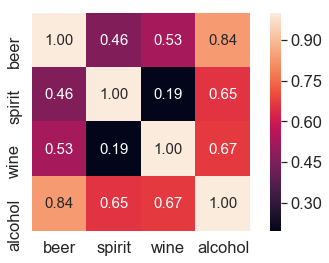

In [86]:
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] #cols 이름 축약
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)
plt.tight_layout()

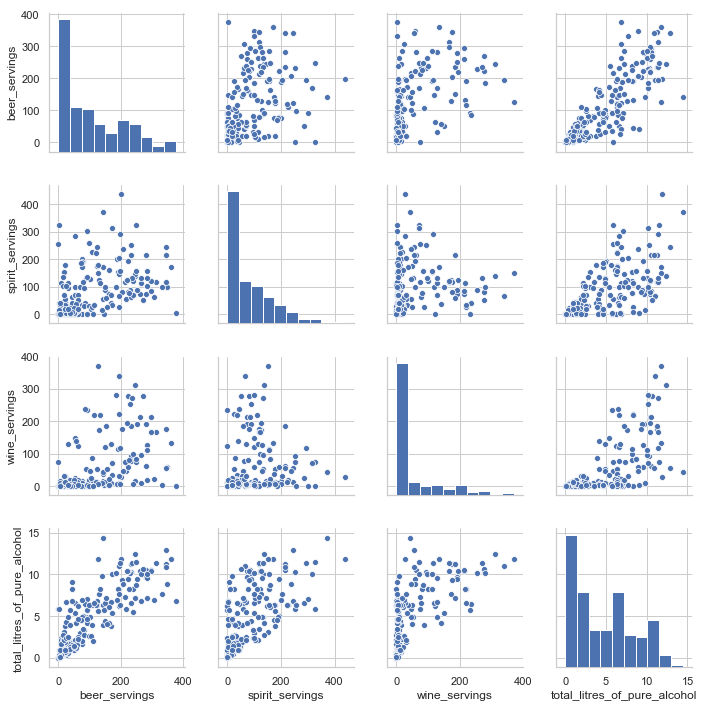

In [88]:
sns.set(style = 'whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']], height = 2.5)

In [90]:
#결측 데이터를 처리 - 기타 대륙으로 통합 (OT)
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.head(10)

country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4             Angola            217               57             45   
5  Antigua & Barbuda            102              128             45   
6          Argentina            193               25            221   
7            Armenia             21              179             11   
8          Australia            261               72            212   
9            Austria            279               75            191   

   total_litres_of_pure_alcohol continent  
0                           0.0        AS  
1                           4.9        EU  
2                           0.7        AF  
3                          12.4        EU  
4                           5.9        AF  
5                           4.9        OT  
6                           8.3        SA  
7                           3.8        EU  
8                          10.4        OC  
9                           9.7        EU

Text(0.5, 1.0, "null data to 'OT'")

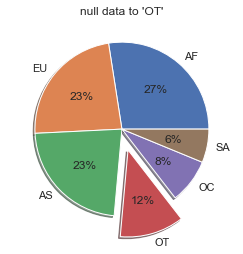

In [92]:
#파이차트로 시각화
labels = drinks['continent'].value_counts().index.tolist()
fracs1 = drinks['continent'].value_counts().values.tolist()
explode = (0,0,0,0.25,0,0)

plt.pie(fracs1, explode=explode, labels=labels, autopct='%.0f%%', shadow=True)
plt.title('null data to \'OT\'')

In [99]:
#미니퀴즈
# print(drinks['continent'])
print(drinks['continent'].value_counts().index.tolist()) #인덱스를 리스트로 출력
drinks['continent'].value_counts().values.tolist() #값의 횟수를 카운트하여 리스트로 출력

#fracs1은 파이차트를 구성할 비율
#labels는 각 파이조각에 입력할 인덱스

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']


[53, 45, 44, 23, 16, 12]

In [101]:
#agg()함수는 그룹에 대한 여러 가지 연산 겨로가를 동시에 얻을 수 있는 함수
result = drinks.groupby('continent').spirit_servings.agg(['mean','min','max','sum'])
result.head()

mean  min  max   sum
continent                            
AF          16.339623    0  152   866
AS          60.840909    0  326  2677
EU         132.555556    0  373  5965
OC          58.437500    0  254   935
OT         165.739130   68  438  3812

In [105]:
#전체 평균보다 많은 알코올을 섭취하는 대륙 구하기
total_mean = drinks.total_litres_of_pure_alcohol.mean()
continent_mean = drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()
continent_over_mean = continent_mean[continent_mean >= total_mean]
continent_over_mean

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [107]:
#평균 beer_servings가 가장 높은 대륙?
beer_continent = drinks.groupby('continent').beer_servings.mean().idxmax()
beer_continent

'EU'

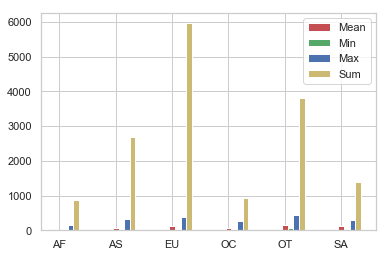

In [116]:
#시각화
#대륙별 spirit_servings의 평균, 최소, 최대, 합계를 시각화
n_groups = len(result.index)
means = result['mean'].tolist()
mins = result['min'].tolist()
maxs = result['max'].tolist()
sums = result['sum'].tolist()

index = np.arange(n_groups)
bar_width = 0.1
rects1 = plt.bar(index, means, bar_width, color='r', label='Mean')
rects2 = plt.bar(index + bar_width, mins, bar_width, color='g', label='Min' )
rects3 = plt.bar(index + bar_width *2, maxs, bar_width, color='b', label='Max' )
rects4 = plt.bar(index + bar_width *3, sums, bar_width, color='y', label='Sum' )

plt.xticks(index, result.index.tolist())
plt.legend()
plt.show()

Text(0.5, 1.0, 'total_litres_of_pure_alcohol by Continent')

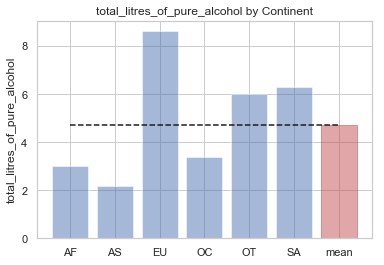

In [129]:
#대륙별 total_litres_of_pure_alcohol을 시각화
continents = continent_mean.index.tolist()
continents.append('mean')
x_pos = np.arange(len(continents))
alcohol = continent_mean.tolist()
alcohol.append(total_mean)

bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents)-1].set_color('r')
plt.plot([0., 6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')

([<matplotlib.axis.XTick at 0x1dcce35def0>,
 <a list of 7 Text xticklabel objects>)

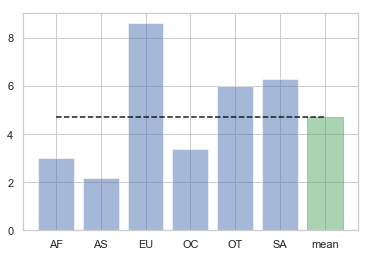

In [130]:
bar_list = plt.bar(x_pos, alcohol, align='center', alpha = 0.5)
bar_list[len(continents)-1].set_color('g')
plt.plot([0., 6], [total_mean, total_mean], 'k--')
plt.xticks(x_pos, continents)


Text(0.5, 1.0, 'beer_servings by Continent')

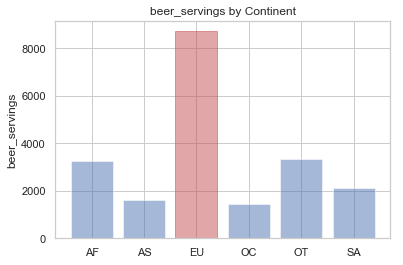

In [131]:
beer_group = drinks.groupby('continent')['beer_servings'].sum()
continents = beer_group.index.tolist()
y_pos = np.arange(len(continents))
alcohol = beer_group.tolist()

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('r')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

Text(0.5, 1.0, 'beer_servings by Continent')

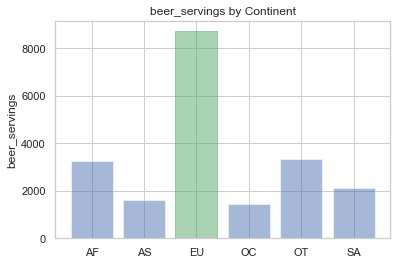

In [132]:
#미니퀴즈
#1번
#각 대륙의 평균/최솟값/최대값/합계를 리스트로 출력
#2번
#legend()함수 
#3번
#set_color()함수

bar_list = plt.bar(y_pos, alcohol, align='center', alpha=0.5)
bar_list[continents.index("EU")].set_color('g')
plt.xticks(y_pos, continents)
plt.ylabel('beer_servings')
plt.title('beer_servings by Continent')

In [133]:
#대한민국은 얼마나 술을 독하게 마시는 나라인가
#total_servings 피처를 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

country  alcohol_rate
63         Gambia      0.266667
153  Sierra Leone      0.223333
124       Nigeria      0.185714
179        Uganda      0.153704
142        Rwanda      0.151111

Text(24, 0.1093939393939394, 'South Korea : 15')

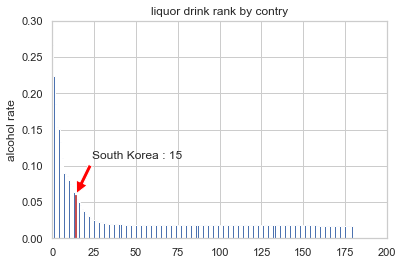

In [134]:
#국가별 순위 정보를 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))